# Work
請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=256, activation="relu", name="hidden_layer1")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu", name="hidden_layer2")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu", name="hidden_layer3")(input_layer)
    
    out = keras.layers.Dense(units=10, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [9]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0907 20:42:07.664478 12228 deprecation.py:323] From C:\Coding\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               786688    
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.3169 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8278 - acc: 0.3518 - val_loss: 1.7093 - val_acc: 0.3959
Epoch 2/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6158 - acc: 0.4353 - val_loss: 1.6269 - val_acc: 0.4202
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5392 - acc: 0.4602 - val_loss: 1.5272 - val_acc: 0.4563
Epoch 4/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4862 - acc: 0.4775 - val_loss: 1.6156 - val_acc: 0.4365
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.4428 - acc: 0.4936 - val_loss: 1.5350 - val_acc: 0.4572
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4041 - acc: 0.5072 - val_loss: 1.4965 - val_acc: 0.4662
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.3734 - acc: 0.5170 - val_loss: 1.4710 - val_acc

50000/50000 [==============================] - 3s 61us/step - loss: 1.7079 - acc: 0.4093 - val_loss: 1.6974 - val_acc: 0.4126
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6738 - acc: 0.4229 - val_loss: 1.6666 - val_acc: 0.4252
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6451 - acc: 0.4322 - val_loss: 1.6410 - val_acc: 0.4308
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6194 - acc: 0.4417 - val_loss: 1.6261 - val_acc: 0.4356
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5974 - acc: 0.4470 - val_loss: 1.6038 - val_acc: 0.4428
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5775 - acc: 0.4565 - val_loss: 1.5883 - val_acc: 0.4476
Epoch 10/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5596 - acc: 0.4626 - val_loss: 1.5702 - val_acc: 0.4551
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 63us/step - loss: 1.8862 - acc: 0.3470 - val_loss: 1.8829 - val_acc: 0.3493
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8698 - acc: 0.3528 - val_loss: 1.8677 - val_acc: 0.3565
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8556 - acc: 0.3604 - val_loss: 1.8549 - val_acc: 0.3582
Epoch 10/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8432 - acc: 0.3640 - val_loss: 1.8425 - val_acc: 0.3663
Epoch 11/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8314 - acc: 0.3696 - val_loss: 1.8318 - val_acc: 0.3669
Epoch 12/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8216 - acc: 0.3721 - val_loss: 1.8229 - val_acc: 0.3696
Epoch 13/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8119 - acc: 0.3752 - val_loss: 1.8140 - val_acc: 0.3734
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 3s 60us/step - loss: 2.1084 - acc: 0.2477 - val_loss: 2.1022 - val_acc: 0.2483
Epoch 11/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0973 - acc: 0.2535 - val_loss: 2.0914 - val_acc: 0.2549
Epoch 12/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0869 - acc: 0.2593 - val_loss: 2.0815 - val_acc: 0.2601
Epoch 13/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0775 - acc: 0.2630 - val_loss: 2.0723 - val_acc: 0.2651
Epoch 14/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0686 - acc: 0.2686 - val_loss: 2.0638 - val_acc: 0.2691
Epoch 15/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0603 - acc: 0.2720 - val_loss: 2.0559 - val_acc: 0.2750
Epoch 16/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0524 - acc: 0.2766 - val_loss: 2.0483 - val_acc: 0.2773
Epoch 17/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 60us/step - loss: 2.2851 - acc: 0.1374 - val_loss: 2.2833 - val_acc: 0.1364
Epoch 14/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.2819 - acc: 0.1401 - val_loss: 2.2802 - val_acc: 0.1382
Epoch 15/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2788 - acc: 0.1426 - val_loss: 2.2772 - val_acc: 0.1418
Epoch 16/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2759 - acc: 0.1440 - val_loss: 2.2743 - val_acc: 0.1450
Epoch 17/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2731 - acc: 0.1463 - val_loss: 2.2716 - val_acc: 0.1479
Epoch 18/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2703 - acc: 0.1481 - val_loss: 2.2689 - val_acc: 0.1502
Epoch 19/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2677 - acc: 0.1493 - val_loss: 2.2662 - val_acc: 0.1511
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 65us/step - loss: 2.4045 - acc: 0.1228 - val_loss: 2.4018 - val_acc: 0.1177
Epoch 17/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3992 - acc: 0.1236 - val_loss: 2.3966 - val_acc: 0.1174
Epoch 18/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.3942 - acc: 0.1239 - val_loss: 2.3917 - val_acc: 0.1167
Epoch 19/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3894 - acc: 0.1239 - val_loss: 2.3870 - val_acc: 0.1170
Epoch 20/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3849 - acc: 0.1238 - val_loss: 2.3826 - val_acc: 0.1171
Epoch 21/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3806 - acc: 0.1242 - val_loss: 2.3784 - val_acc: 0.1180
Epoch 22/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3766 - acc: 0.1245 - val_loss: 2.3745 - val_acc: 0.1184
Epoch 23/50
50000/50000 [=====================

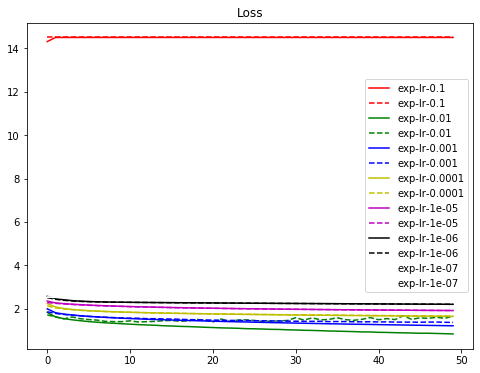

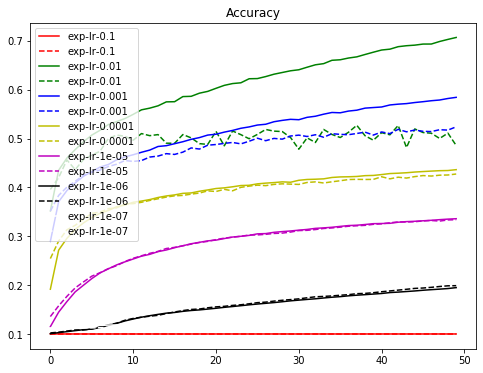

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "w", "c"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()